# Importação e visualização inicial da base de dados

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sicro = pd.read_csv("/content/SICRO_COMPLETO_2022-2024.csv", encoding="latin1")

/tmp/ipython-input-1201964866.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  sicro = pd.read_csv("/content/SICRO_COMPLETO_2022-2024.csv", encoding="latin1")


In [ ]:
sicro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552771 entries, 0 to 552770
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CÓDIGO             552771 non-null  object 
 1   DESCRIÇÃO          552771 non-null  object 
 2   UNIDADE            552771 non-null  object 
 3   UF                 552771 non-null  object 
 4   Preço.Entregue     552771 non-null  float64
 5   Preço.Final        552771 non-null  float64
 6   REF                552771 non-null  object 
 7   PEI                552771 non-null  object 
 8   Relação.Liderança  552771 non-null  object 
 9   Item.Líder         552582 non-null  object 
 10  Família            552771 non-null  object 
 11  TipoInsumo         552771 non-null  object 
 12  Nota.Revisional    552771 non-null  object 
 13  Região             552447 non-null  object 
dtypes: float64(2), object(12)
memory usage: 59.0+ MB


In [ ]:
sicro.head()

,CÓDIGO,DESCRIÇÃO,UNIDADE,UF,Preço.Entregue,Preço.Final,REF,PEI,Relação.Liderança,Item.Líder,Família,TipoInsumo,Nota.Revisional,Região
0,M1135,Pó de Pedra,m³,AC,214.2249,214.2249,202201,ECT,LIDERADO,M0191,BRITA,Liderado,Não,Norte
1,M1097,Pedra de mão ou rachão,m³,AC,224.9082,224.9082,202201,E,LIDERADO,M0191,BRITA,Liderado,Não,Norte
2,M1135,Pó de Pedra,m³,MA,96.1989,96.1989,202201,ECT,LIDERADO,M0191,BRITA,Liderado,Não,Nordestes
3,M0808,Brita 4,m³,AC,235.5956,235.5956,202201,E,LIDERADO,M0191,BRITA,Liderado,Não,Norte
4,M1135,Pó de Pedra,m³,RR,167.4597,167.4597,202201,P,LIDERADO,M0191,BRITA,Liderado,Não,Norte


In [ ]:
sicro.tail()

,CÓDIGO,DESCRIÇÃO,UNIDADE,UF,Preço.Entregue,Preço.Final,REF,PEI,Relação.Liderança,Item.Líder,Família,TipoInsumo,Nota.Revisional,Região
552766,P9956,Motorista de caminhão com periculosidade,h,CE,12.2300,12.2300,202407,MDO,LÍDER,P9956,Sem Família,Mão de obra,Não,Nordestes
552767,P9956,Motorista de caminhão com periculosidade,h,MA,10.9300,10.9300,202407,MDO,LÍDER,P9956,Sem Família,Mão de obra,Não,Nordestes
552768,P9956,Motorista de caminhão com periculosidade,h,PE,12.2700,12.2700,202407,MDO,LÍDER,P9956,Sem Família,Mão de obra,Não,Nordestes
552769,P9956,Motorista de caminhão com periculosidade,h,RN,11.9926,11.9926,202407,MDO,LÍDER,P9956,Sem Família,Mão de obra,Não,Nordestes
552770,P9956,Motorista de caminhão com periculosidade,h,RR,10.3300,10.3300,202407,MDO,LÍDER,P9956,Sem Família,Mão de obra,Não,Norte


In [ ]:
sicro.describe().T

,count,mean,std,min,25%,50%,75%,max
Preço.Entregue,552771.0,2.061790e+06,3.376457e+07,0.0,49.23365,2127.2401,52112.9354,1.316712e+09
Preço.Final,552771.0,2.061731e+06,3.376457e+07,0.0,49.74045,2141.9920,52446.7272,1.316712e+09


In [ ]:
sicro.isnull().sum()

,0
CÓDIGO,0
DESCRIÇÃO,0
UNIDADE,0
UF,0
Preço.Entregue,0
Preço.Final,0
REF,0
PEI,0
Relação.Liderança,0
Item.Líder,189




---



# Limpeza e seleção do grupo a ser analisado

In [ ]:
sicro = sicro.dropna()
sicro.isnull().sum()

,0
CÓDIGO,0
DESCRIÇÃO,0
UNIDADE,0
UF,0
Preço.Entregue,0
Preço.Final,0
REF,0
PEI,0
Relação.Liderança,0
Item.Líder,0


In [ ]:
print(sicro['TipoInsumo'].value_counts())


TipoInsumo
Material DMT    264330
Equipamento     123201
Liderado         98766
Líder            39582
Mão de obra      26379
Name: count, dtype: int64


In [ ]:
mdo_df = sicro[sicro["TipoInsumo"] == "Mão de obra"][["DESCRIÇÃO", "UNIDADE", "UF", "Preço.Entregue", "Preço.Final", "REF", "PEI", "Região"]]

mdo_df.to_csv('mdo_df.csv', index=False)

In [ ]:
print(mdo_df['PEI'].value_counts())

PEI
MDO    26379
Name: count, dtype: int64


In [ ]:
mdo_df.reset_index()

,index,DESCRIÇÃO,UNIDADE,UF,Preço.Entregue,Preço.Final,REF,PEI,Região
0,9186,Pedreiro - mensalista,mês,MT,1950.0000,1950.0000,202201,MDO,Centro-Oeste
1,9187,Pedreiro,h,MT,8.8636,8.8636,202201,MDO,Centro-Oeste
2,11157,Carpinteiro,h,MT,8.8636,8.8636,202201,MDO,Centro-Oeste
3,12482,Servente,h,AM,6.4900,6.4900,202201,MDO,Norte
4,12483,Servente com periculosidade,h,AM,6.4900,6.4900,202201,MDO,Norte
...,...,...,...,...,...,...,...,...,...
26374,552766,Motorista de caminhão com periculosidade,h,CE,12.2300,12.2300,202407,MDO,Nordestes
26375,552767,Motorista de caminhão com periculosidade,h,MA,10.9300,10.9300,202407,MDO,Nordestes
26376,552768,Motorista de caminhão com periculosidade,h,PE,12.2700,12.2700,202407,MDO,Nordestes
26377,552769,Motorista de caminhão com periculosidade,h,RN,11.9926,11.9926,202407,MDO,Nordestes




----------------



# Estatísticas gerais do preço da mão de obra



In [ ]:
mdo_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Preço.Entregue,26379.0,2425.56097,3424.957632,5.5091,9.9237,1625.0595,3365.2097,19165.57
Preço.Final,26379.0,2425.56097,3424.957632,5.5091,9.9237,1625.0595,3365.2097,19165.57


In [ ]:
media_geral = round(mdo_df['Preço.Final'].mean(), 3)
mediana_geral = round(mdo_df['Preço.Final'].median(), 3)
dp_geral = round(mdo_df['Preço.Final'].std(ddof=1), 3)
vr_geral = round(mdo_df['Preço.Final'].var(ddof=1), 3)
amp_abs_geral = round(mdo_df["Preço.Final"].max() - mdo_df["Preço.Final"].min(), 3)
amp_rel_geral = round(amp_abs_geral / media_geral * 100, 3)
iqr_geral = round(mdo_df["Preço.Final"].quantile(0.75) - mdo_df["Preço.Final"].quantile(0.25), 3)


print(f"RESUMO ESTATÍSTICO")

resumo_geral = {
    'Média geral dos preços': [media_geral],
    'Mediana geral dos preços': [mediana_geral],
    'Desvio padrão geral dos preços': [dp_geral],
    'Variância geral dos preços': [vr_geral],
    'Amplitude absoluta geral dos preços': [amp_abs_geral],
    'Amplitude relativa geral dos preços': [f"{amp_rel_geral}%"],
    'Intervalo interquartil geral dos preços': [iqr_geral]
}

resumo_geral = pd.DataFrame(resumo_geral)

display(resumo_geral)

RESUMO ESTATÍSTICO


,Média geral dos preços,Mediana geral dos preços,Desvio padrão geral dos preços,Variância geral dos preços,Amplitude absoluta geral dos preços,Amplitude relativa geral dos preços,Intervalo interquartil geral dos preços
0,2425.561,1625.06,3424.958,1.173033e+07,19160.061,789.923%,3355.286


Desvio padrão alto, intervalo interquartil alto, media e mediana bem distantes

In [ ]:
mdo_df.groupby('PEI')[["DESCRIÇÃO", "UNIDADE", "UF", "REF", "Região"]].agg(lambda x:pd.Series.mode(x))

,DESCRIÇÃO,UNIDADE,UF,REF,Região
PEI,,,,,
MDO,"[Ajudante, Ajudante especializado, Almoxarife,...",mês,"[AC, AL, AM, AP, BA, CE, DF, ES, GO, MA, MG, M...","[202207, 202301]",Nordestes


Região mais frequente é o Nordeste

In [ ]:
mdo_df["zscore"] = (mdo_df["Preço.Final"] - media_geral) / (dp_geral)
display(mdo_df)

,DESCRIÇÃO,UNIDADE,UF,Preço.Entregue,Preço.Final,REF,PEI,Região,zscore
9186,Pedreiro - mensalista,mês,MT,1950.0000,1950.0000,202201,MDO,Centro-Oeste,-0.138852
9187,Pedreiro,h,MT,8.8636,8.8636,202201,MDO,Centro-Oeste,-0.705614
11157,Carpinteiro,h,MT,8.8636,8.8636,202201,MDO,Centro-Oeste,-0.705614
12482,Servente,h,AM,6.4900,6.4900,202201,MDO,Norte,-0.706307
12483,Servente com periculosidade,h,AM,6.4900,6.4900,202201,MDO,Norte,-0.706307
...,...,...,...,...,...,...,...,...,...
552766,Motorista de caminhão com periculosidade,h,CE,12.2300,12.2300,202407,MDO,Nordestes,-0.704631
552767,Motorista de caminhão com periculosidade,h,MA,10.9300,10.9300,202407,MDO,Nordestes,-0.705010
552768,Motorista de caminhão com periculosidade,h,PE,12.2700,12.2700,202407,MDO,Nordestes,-0.704619
552769,Motorista de caminhão com periculosidade,h,RN,11.9926,11.9926,202407,MDO,Nordestes,-0.704700


In [ ]:
outliers_geral = mdo_df[(mdo_df["zscore"] >= 2) | (mdo_df["zscore"] <= -2)]
proporcao_outliers = len(outliers_geral) / len(mdo_df) * 100

print(f"Quantidade de outliers na população: {len(outliers_geral)}\nProporção de outliers na amostra: {proporcao_outliers:.2f}%")

Quantidade de outliers na população: 2172
Proporção de outliers na amostra: 8.23%


Quantidade proporcional de outliers um pouco alta, deveria estar em torno de 4 a 5%

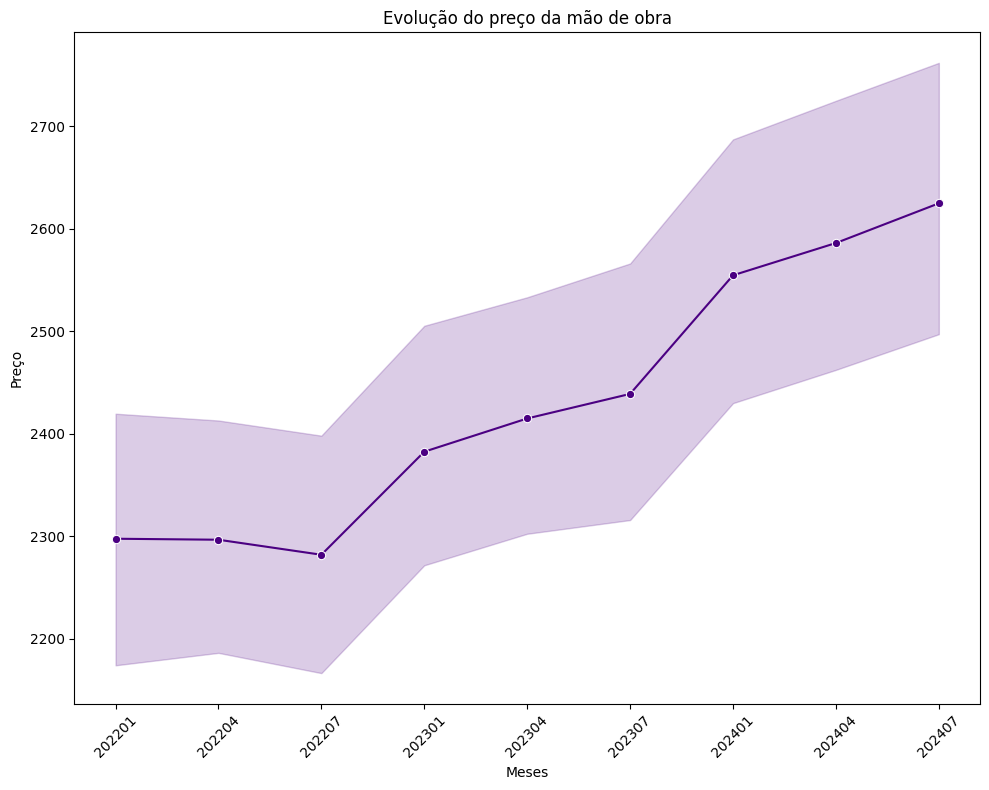

In [ ]:
mdo_df['REF'] = mdo_df['REF'].astype(str)

ref_ordenado = sorted(mdo_df["REF"].unique())

plt.figure(figsize=(10,8))
sns.lineplot(
    data=mdo_df,
    x="REF",
    y="Preço.Final",
    marker="o",
    color="indigo"
)

plt.xticks(ref_ordenado, rotation=45)

plt.title("Evolução do preço da mão de obra")
plt.xlabel("Meses")
plt.ylabel("Preço")
plt.tight_layout()
plt.show()

Tendência de aumento, com pequenas quedas em julho de 2022 e 2023

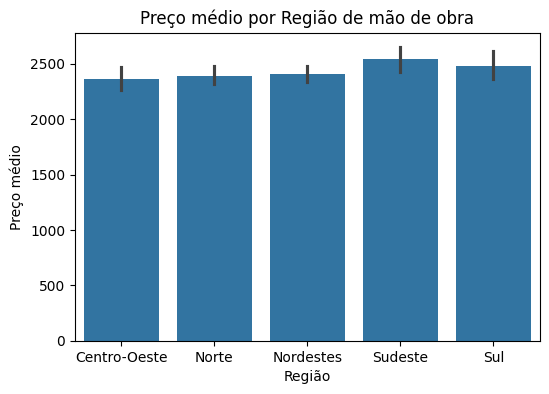

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data=mdo_df, x="Região", y="Preço.Final", estimator="mean")
plt.title("Preço médio por Região de mão de obra")
plt.xlabel("Região")
plt.ylabel("Preço médio")
plt.show()

Sudeste com maior média, e centro-oeste com menor média

/tmp/ipython-input-28994965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


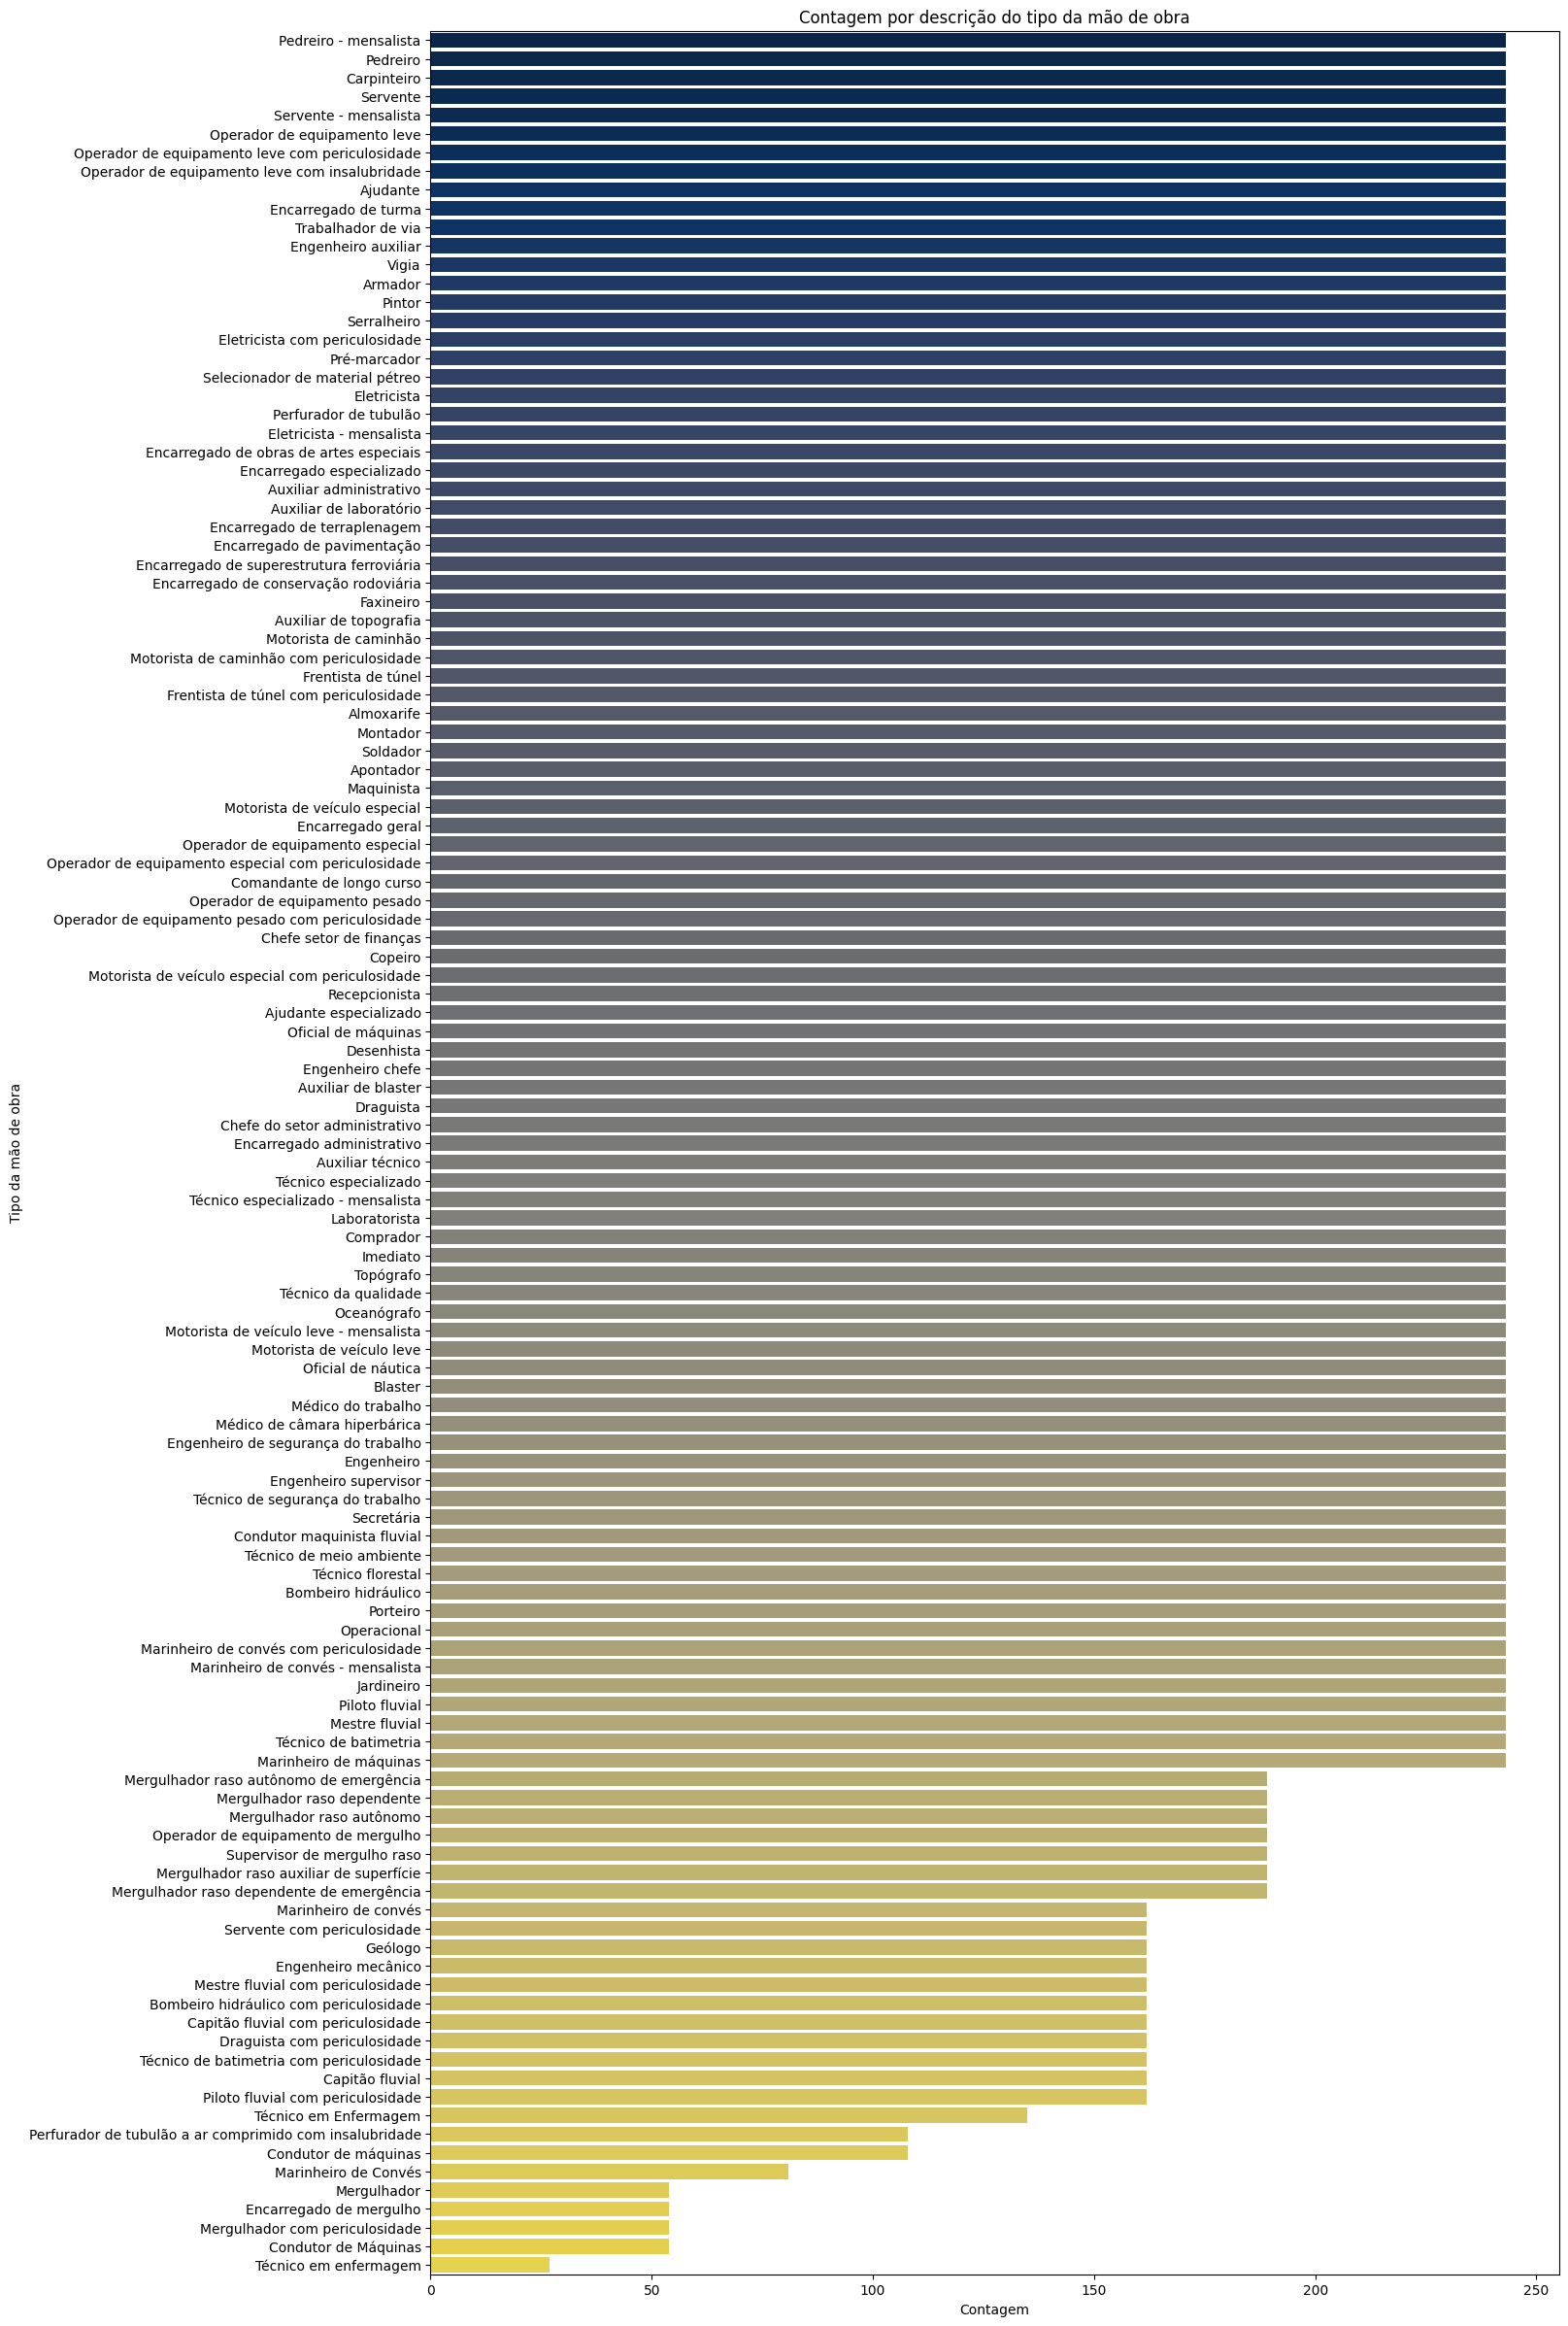

In [ ]:
plt.figure(figsize=(15,30))
sns.countplot(
    data=mdo_df,
    y="DESCRIÇÃO",
    order=mdo_df["DESCRIÇÃO"].value_counts().index,
    palette="cividis"
)
plt.title("Contagem por descrição do tipo da mão de obra")
plt.xlabel("Contagem")
plt.ylabel("Tipo da mão de obra")
plt.show()

Variação entre o tipo de mão de obra não é tão grande, tendo muitas muito frequentes, e poucas com frequência baixa

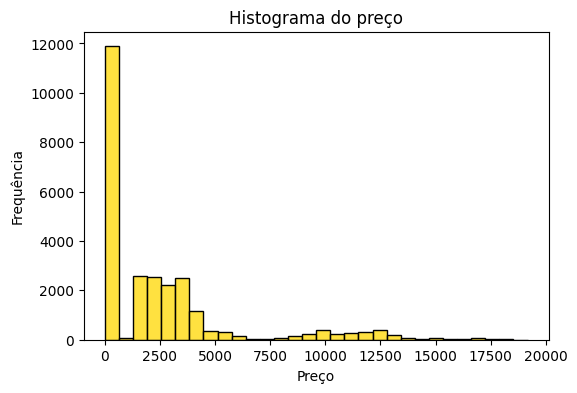

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(
    mdo_df["Preço.Final"],
    bins=30,
    color="gold"
)
plt.title("Histograma do preço")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

Preços mais concentrados a esquerda, valores mais baixos

/tmp/ipython-input-3696779301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


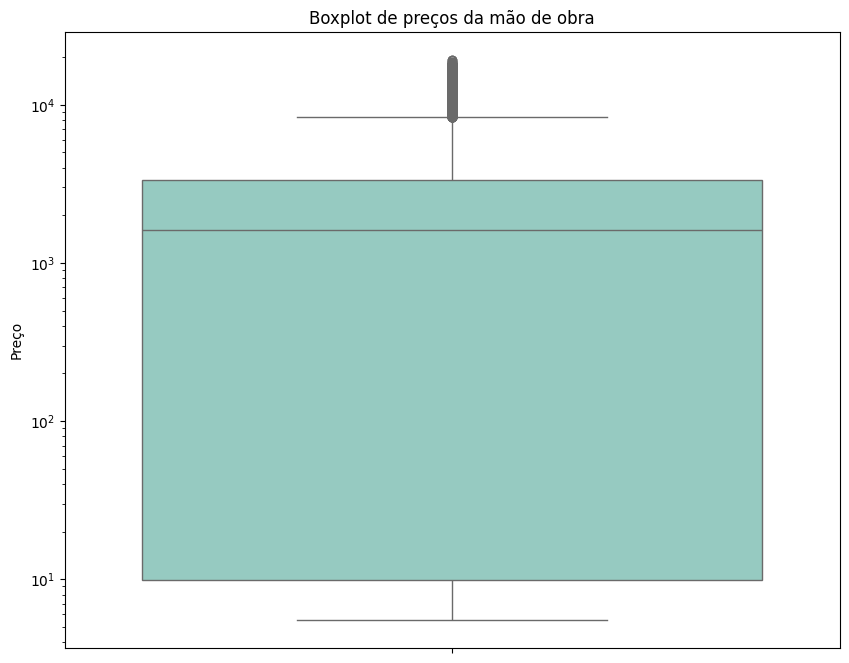

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(
    data=mdo_df,
    y="Preço.Final",
    palette="Set3"
)

plt.yscale("log")
plt.title("Boxplot de preços da mão de obra")
plt.ylabel("Preço")
plt.show()

Valores concetrados entre o primeiro quartil e a mediana

/tmp/ipython-input-1849448200.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


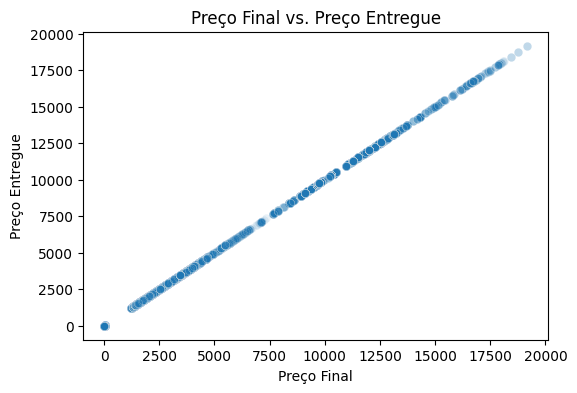

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=mdo_df,
    x="Preço.Final",
    y="Preço.Entregue",
    alpha=0.1,
    palette="tab20"
)
plt.title("Preço Final vs. Preço Entregue")
plt.xlabel("Preço Final")
plt.ylabel("Preço Entregue")
plt.show()

Correlação 100%

/tmp/ipython-input-1771508718.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


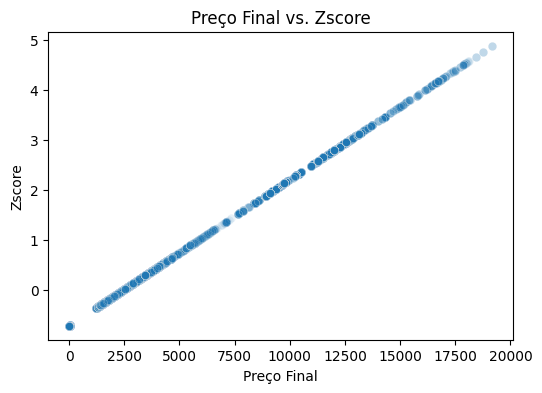

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=mdo_df,
    x="Preço.Final",
    y="zscore",
    alpha=0.1,
    palette="tab20"
)
plt.title("Preço Final vs. Zscore")
plt.xlabel("Preço Final")
plt.ylabel("Zscore")
plt.show()

Correlação 100%

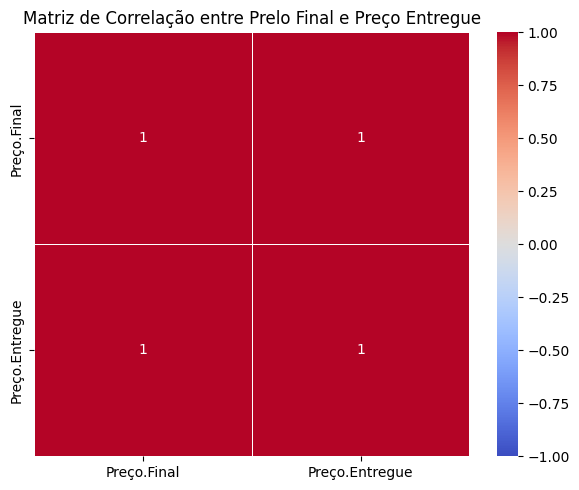

In [ ]:
corr = mdo_df[["Preço.Final", "Preço.Entregue"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title("Matriz de Correlação entre Prelo Final e Preço Entregue")
plt.tight_layout()
plt.show()

Correlação 100%

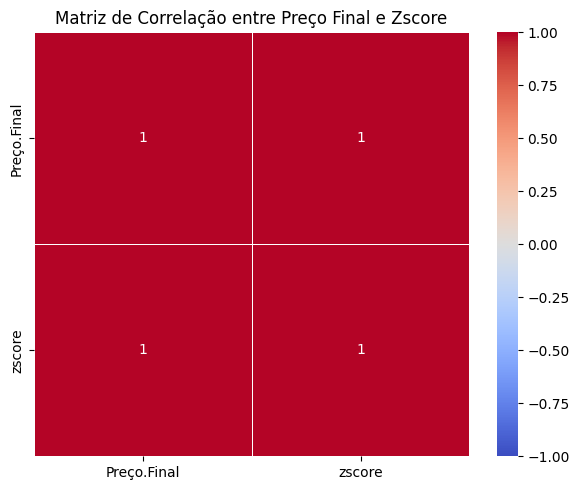

In [ ]:
corr = mdo_df[["Preço.Final", "zscore"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title("Matriz de Correlação entre Preço Final e Zscore")
plt.tight_layout()
plt.show()

Correlação 100%



---



# Estatísticas da mão de obra por região

In [ ]:
freq_abs_reg = mdo_df['Região'].value_counts()
freq_rel_reg = mdo_df['Região'].value_counts(normalize=True)*100

media_regiao = round(mdo_df.groupby('Região')['Preço.Final'].mean(), 3)
mediana_regiao = round(mdo_df.groupby('Região')['Preço.Final'].median(), 3)
dp_regiao = round(mdo_df.groupby('Região')['Preço.Final'].std(ddof=1), 3)
vr_regiao = round(mdo_df.groupby('Região')['Preço.Final'].var(ddof=1), 3)
amp_abs_regiao = round(mdo_df.groupby('Região')["Preço.Final"].max() - mdo_df.groupby('Região')["Preço.Final"].min(), 3)
amp_rel_regiao = round((amp_abs_regiao /  media_regiao)* 100, 3)
iqr_regiao = round(mdo_df.groupby('Região')["Preço.Final"].quantile(0.75) - mdo_df.groupby('Região')["Preço.Final"].quantile(0.25), 3)

In [ ]:
resumo_regiao = pd.concat([
    freq_abs_reg.rename("Frequência Absoluta"),
    freq_rel_reg.rename("Frequência Relativa"),
    media_regiao.rename("Média"),
    mediana_regiao.rename("Mediana"),
    dp_regiao.rename("Desvio Padrão"),
    vr_regiao.rename("Variância"),
    amp_abs_regiao.rename("Amplitude Absoluta"),
    amp_rel_regiao.rename("Amplitude Relativa"),
    iqr_regiao.rename("IQR")
], axis=1)

resumo_regiao["Frequência Relativa"] = resumo_regiao["Frequência Relativa"].astype(str) + "%"
resumo_regiao["Amplitude Relativa"] = resumo_regiao["Amplitude Relativa"].astype(str) + "%"

display(resumo_regiao)

,Frequência Absoluta,Frequência Relativa,Média,Mediana,Desvio Padrão,Variância,Amplitude Absoluta,Amplitude Relativa,IQR
Região,,,,,,,,,
Nordestes,8793,33.33333333333333%,2409.310,1537.834,3423.710,1.172179e+07,16935.821,702.932%,3309.746
Norte,6839,25.925925925925924%,2392.306,1556.000,3369.154,1.135120e+07,16447.381,687.512%,3354.560
Centro-Oeste,3908,14.814814814814813%,2361.997,1571.356,3336.363,1.113132e+07,15858.241,671.391%,3297.439
Sudeste,3908,14.814814814814813%,2542.151,1782.211,3523.076,1.241206e+07,17978.441,707.214%,3568.714
Sul,2931,11.11111111111111%,2481.206,1750.098,3537.871,1.251653e+07,19159.466,772.184%,3446.325


In [ ]:
mdo_df.groupby('Região')[["UNIDADE", "UF", "REF", "PEI"]].agg(lambda x:pd.Series.mode(x))

,UNIDADE,UF,REF,PEI
Região,,,,
Centro-Oeste,mês,"[DF, GO, MS, MT]","[202207, 202301]",MDO
Nordestes,mês,"[AL, BA, CE, MA, PB, PE, PI, RN, SE]","[202207, 202301]",MDO
Norte,mês,"[AC, AM, AP, PA, RO, RR, TO]","[202207, 202301]",MDO
Sudeste,mês,"[ES, MG, RJ, SP]","[202207, 202301]",MDO
Sul,mês,"[PR, RS, SC]","[202207, 202301]",MDO


/tmp/ipython-input-2015199172.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


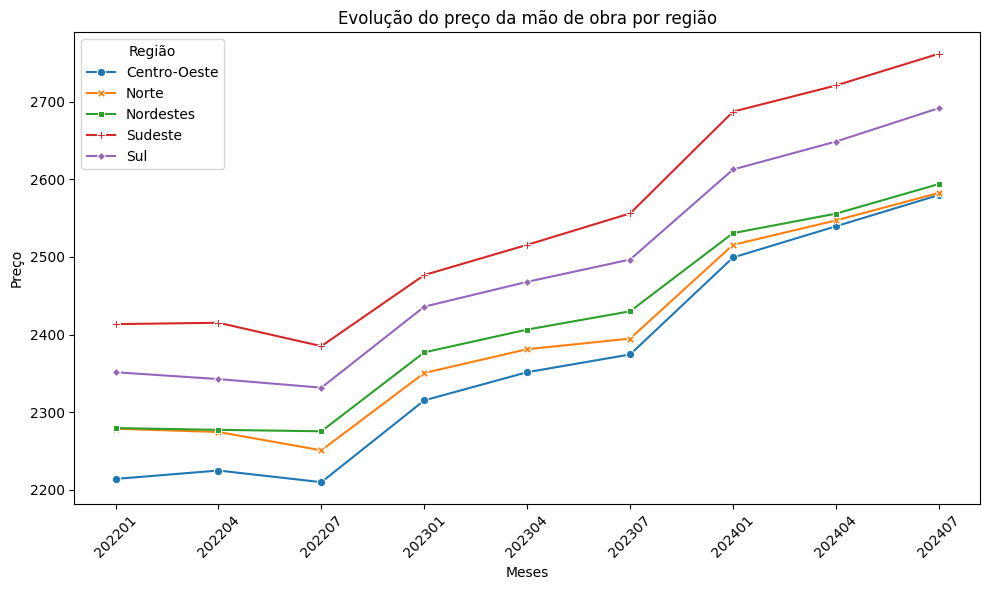

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=mdo_df,
    x="REF",
    y="Preço.Final",
    hue="Região",
    style="Região",
    markers=True,
    dashes=False,
    ci=None
)

plt.xticks(rotation=45)
plt.title("Evolução do preço da mão de obra por região")
plt.xlabel("Meses")
plt.ylabel("Preço")
plt.tight_layout()
plt.show()


Tendencia geral igual, mas sudeste e norte parecem ter mais picos, e centro-oeste aumentou bastante temporalmente

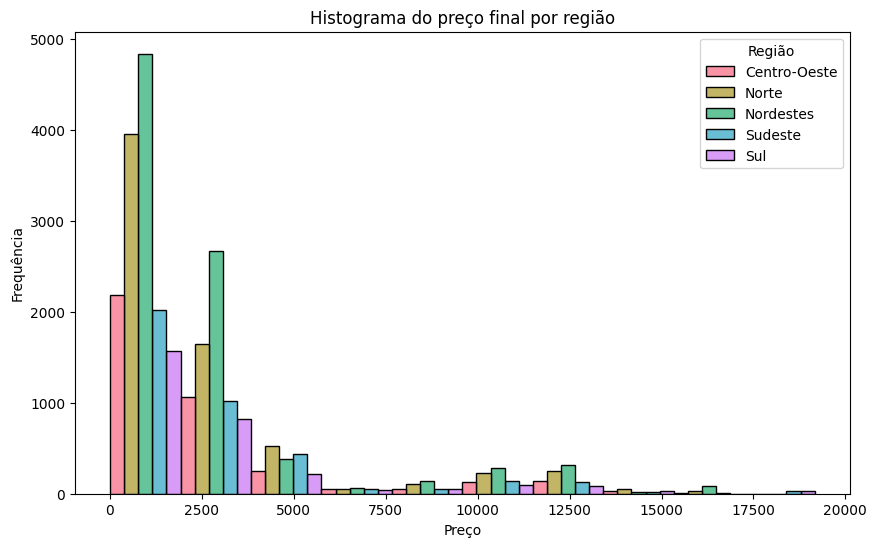

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data = mdo_df,
    x = "Preço.Final",
    hue="Região",
    multiple="dodge",
    bins=10,
    palette="husl"
)

plt.title("Histograma do preço final por região")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

Nordeste e Norte concentram valores de preços mais baixos

/tmp/ipython-input-2722898366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


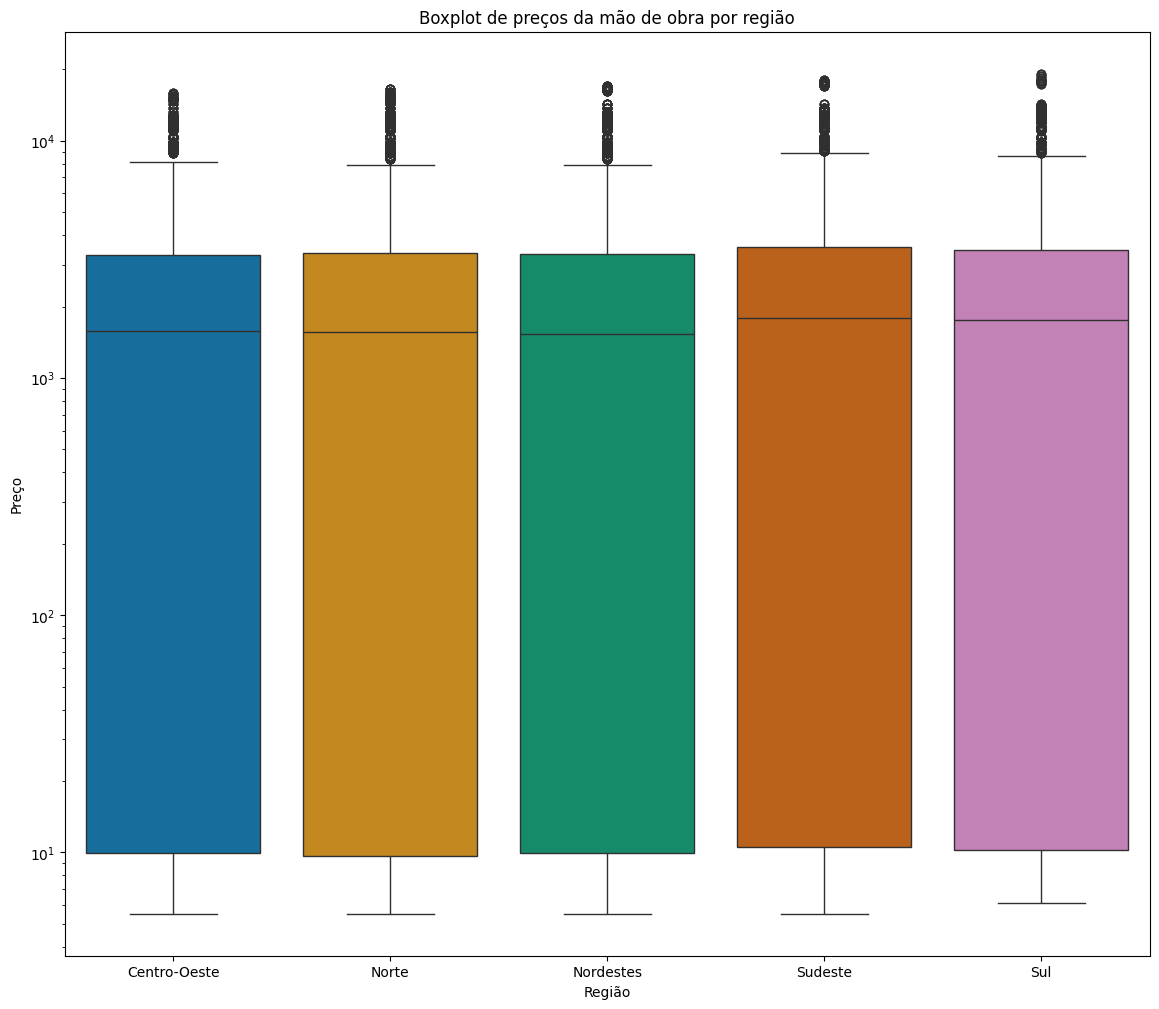

In [ ]:
plt.figure(figsize=(14,12))
sns.boxplot(
    data=mdo_df,
    x="Região",
    y="Preço.Final",
    palette="colorblind"
)

plt.yscale("log")
plt.title("Boxplot de preços da mão de obra por região")
plt.xlabel("Região")
plt.ylabel("Preço")
plt.show()

Caixas mais altas no sudeste principlamente, e medianas mais altas no sul e sudeste

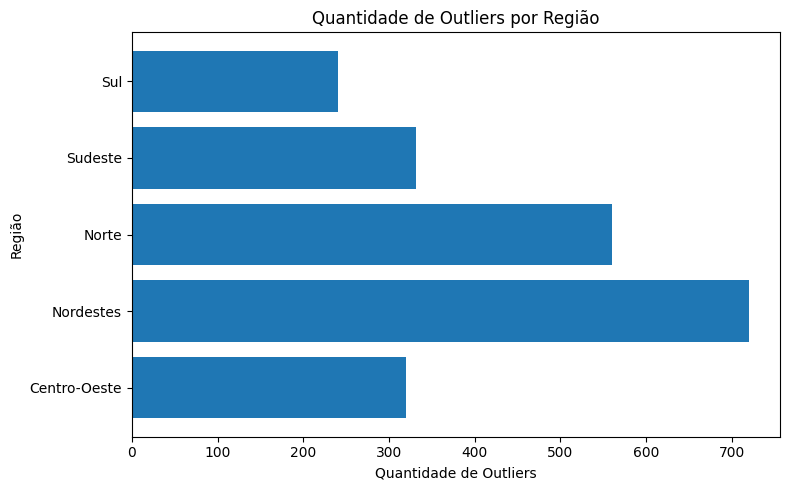

In [ ]:
outliers_regiao = outliers_geral.groupby('Região').size()

plt.figure(figsize=(8, 5))
plt.barh(outliers_regiao.index, outliers_regiao.values)
plt.title("Quantidade de Outliers por Região")
plt.xlabel("Quantidade de Outliers")
plt.ylabel("Região")
plt.tight_layout()
plt.show()

Muitos outliers no Nordeste



---



# Estatísticas da mão de obra por unidade federativa

In [ ]:
freq_abs_uf = mdo_df['UF'].value_counts()
freq_rel_uf = mdo_df['UF'].value_counts(normalize=True)*100

media_uf = round(mdo_df.groupby('UF')['Preço.Final'].mean(), 3)
mediana_uf = round(mdo_df.groupby('UF')['Preço.Final'].median(), 3)
dp_uf = round(mdo_df.groupby('UF')['Preço.Final'].std(ddof=1), 3)
vr_uf = round(mdo_df.groupby('UF')['Preço.Final'].var(ddof=1), 3)
amp_abs_uf = round(mdo_df.groupby('UF')["Preço.Final"].max() - mdo_df.groupby('UF')["Preço.Final"].min(), 3)
amp_rel_uf = round((amp_abs_uf /  media_uf)* 100, 3)
iqr_uf = round(mdo_df.groupby('UF')["Preço.Final"].quantile(0.75) - mdo_df.groupby('UF')["Preço.Final"].quantile(0.25), 3)

In [ ]:
resumo_uf = pd.concat([
    freq_abs_uf.rename("Frequência Absoluta"),
    freq_rel_uf.rename("Frequência Relativa"),
    media_uf.rename("Média"),
    mediana_uf.rename("Mediana"),
    dp_uf.rename("Desvio Padrão"),
    vr_uf.rename("Variância"),
    amp_abs_uf.rename("Amplitude Absoluta"),
    amp_rel_uf.rename("Amplitude Relativa"),
    iqr_uf.rename("IQR")
], axis=1)

resumo_uf["Frequência Relativa"] = resumo_uf["Frequência Relativa"].astype(str) + "%"
resumo_uf["Amplitude Relativa"] = resumo_uf["Amplitude Relativa"].astype(str) + "%"

display(resumo_uf)

,Frequência Absoluta,Frequência Relativa,Média,Mediana,Desvio Padrão,Variância,Amplitude Absoluta,Amplitude Relativa,IQR
UF,,,,,,,,,
MT,977,3.7037037037037033%,2373.274,1594.708,3340.164,1.115670e+07,15855.988,668.106%,3309.580
AM,977,3.7037037037037033%,2390.700,1556.000,3365.533,1.132681e+07,16446.367,687.931%,3466.454
SE,977,3.7037037037037033%,2371.934,1518.700,3415.888,1.166829e+07,16933.668,713.918%,3166.106
AC,977,3.7037037037037033%,2319.584,1534.928,3345.143,1.118998e+07,16443.890,708.915%,2966.448
AL,977,3.7037037037037033%,2387.608,1537.834,3420.044,1.169670e+07,16932.532,709.184%,3266.807
AP,977,3.7037037037037033%,2379.784,1557.587,3361.998,1.130303e+07,16444.011,690.988%,3320.458
BA,977,3.7037037037037033%,2450.023,1551.000,3435.888,1.180533e+07,16935.461,691.237%,3379.167
CE,977,3.7037037037037033%,2425.256,1521.455,3431.502,1.177521e+07,16934.201,698.244%,3380.541
DF,977,3.7037037037037033%,2356.694,1572.312,3335.756,1.112727e+07,15858.241,672.902%,3309.694


Todas as UFs tem a mesma frequência

In [ ]:
mdo_df.groupby('UF')[["UNIDADE", "REF", "PEI"]].agg(lambda x:pd.Series.mode(x))

,UNIDADE,REF,PEI
UF,,,
AC,mês,"[202207, 202301]",MDO
AL,mês,"[202207, 202301]",MDO
AM,mês,"[202207, 202301]",MDO
AP,mês,"[202207, 202301]",MDO
BA,mês,"[202207, 202301]",MDO
CE,mês,"[202207, 202301]",MDO
DF,mês,"[202207, 202301]",MDO
ES,mês,"[202207, 202301]",MDO
GO,mês,"[202207, 202301]",MDO


In [ ]:
outliers_uf = outliers_geral.groupby('UF').size()
print(f"Quantidade de outliers por UF:\n{outliers_uf}")

Quantidade de outliers por UF:
UF
AC    80
AL    80
AM    80
AP    80
BA    80
CE    80
DF    80
ES    83
GO    80
MA    80
MG    83
MS    80
MT    80
PA    80
PB    80
PE    80
PI    80
PR    80
RJ    83
RN    80
RO    80
RR    80
RS    80
SC    80
SE    80
SP    83
TO    80
dtype: int64


Praticamente a mesma quantidade de outliers por UF

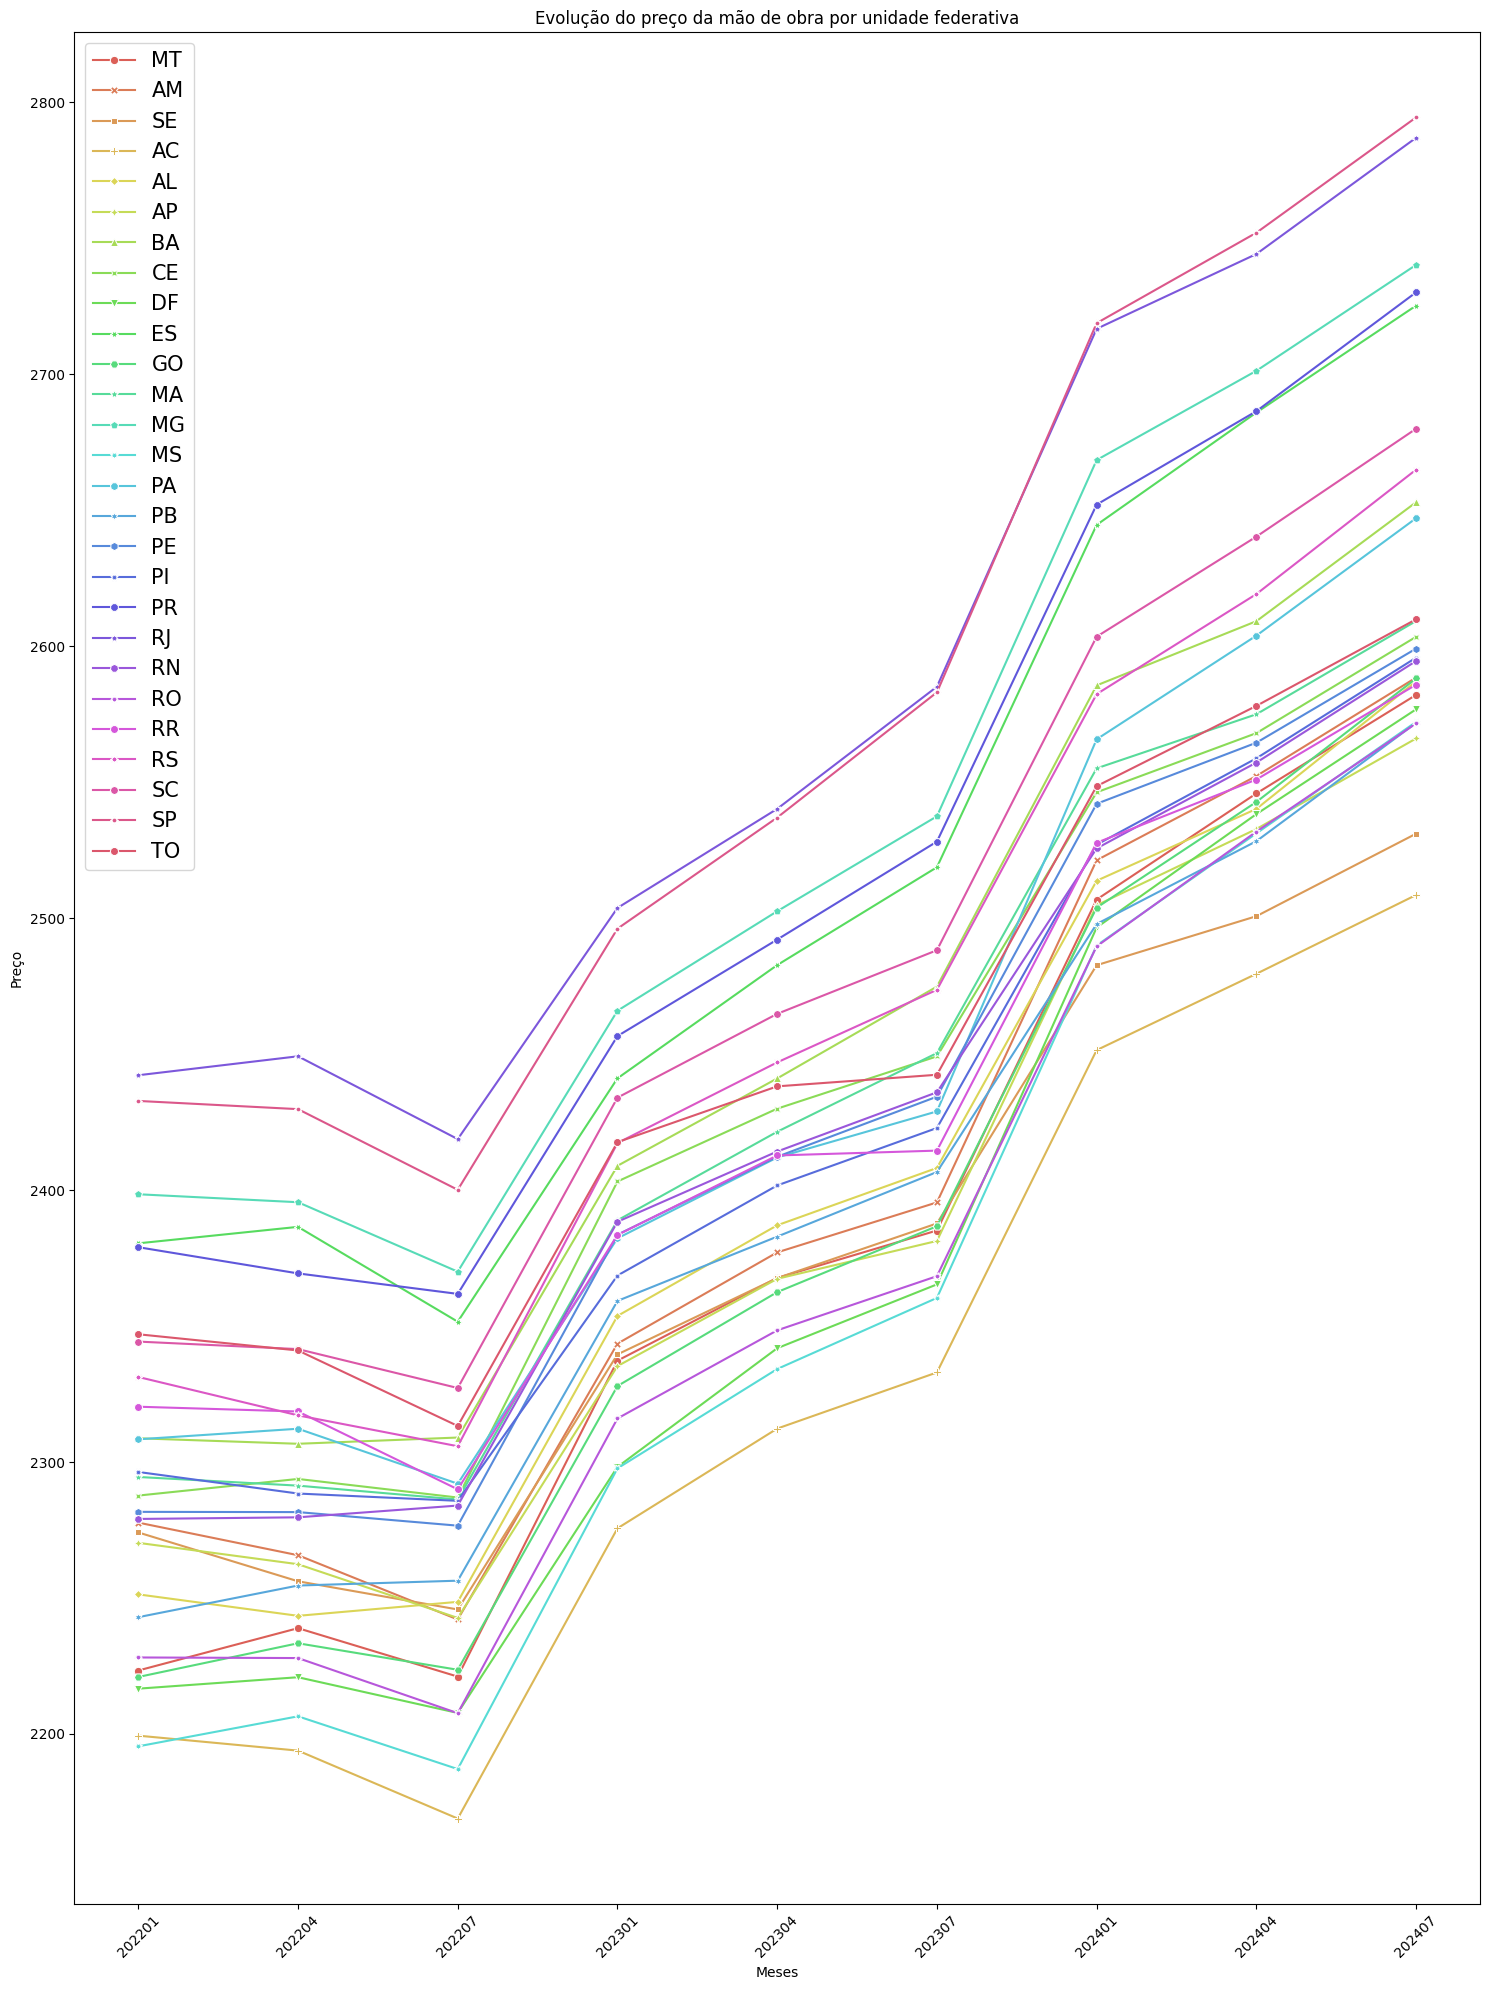

In [ ]:
plt.figure(figsize=(15, 20))
sns.lineplot(
    data=mdo_df,
    x="REF",
    y="Preço.Final",
    hue="UF",
    palette="hls",
    style="UF",
    markers=True,
    dashes=False,
    errorbar=None
)

plt.xticks(rotation=45)
plt.title("Evolução do preço da mão de obra por unidade federativa")
plt.xlabel("Meses")
plt.ylabel("Preço")
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

RS e SC: alta mais acentuada
AC, RO e PI: crescimento baixo, ampliando a distância
PE e RN: variação irregular
SP e DF: crescimento estável

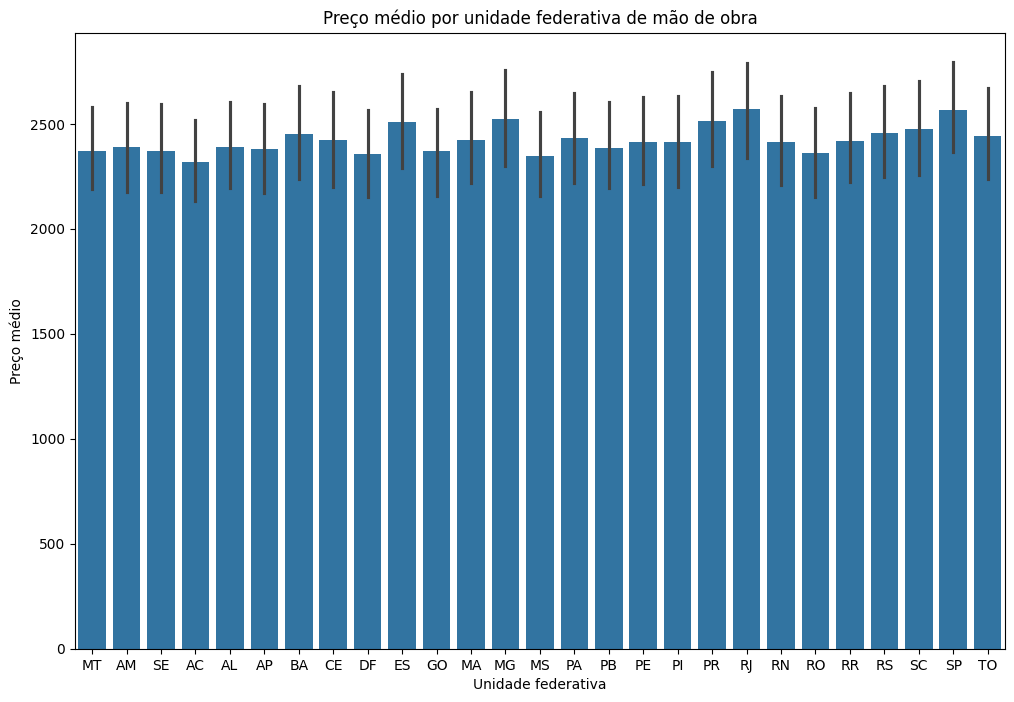

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=mdo_df, x="UF", y="Preço.Final", estimator="mean")
plt.title("Preço médio por unidade federativa de mão de obra")
plt.xlabel("Unidade federativa")
plt.ylabel("Preço médio")
plt.show()

Maiores médias: SP, MG, RJ, PR e ES

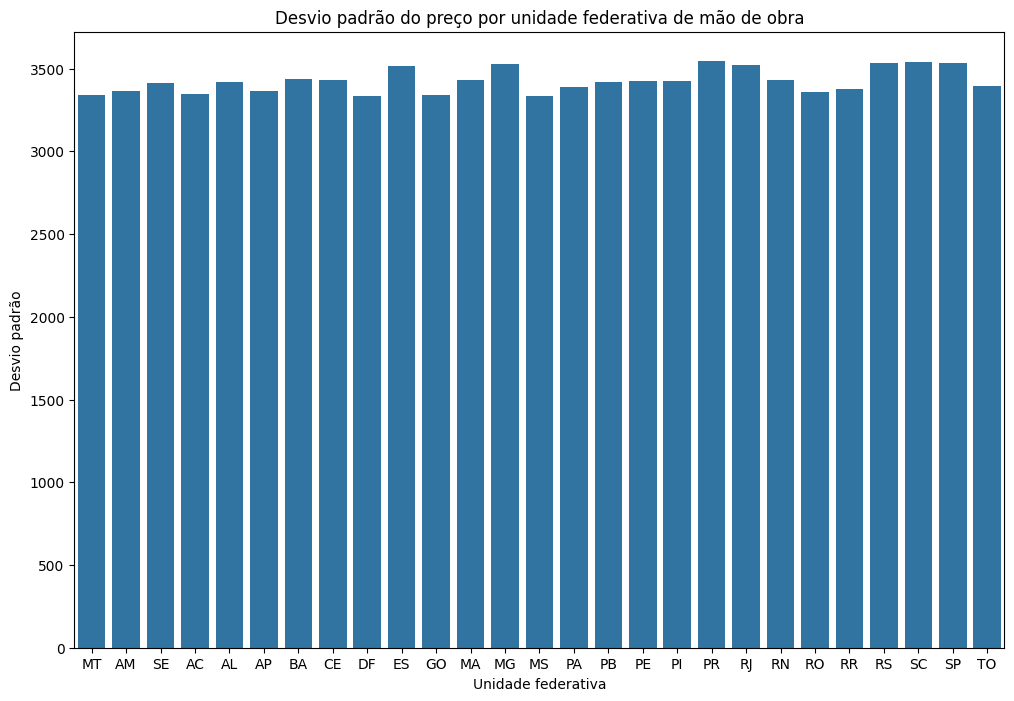

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=resumo_uf, x="UF", y="Desvio Padrão")
plt.title("Desvio padrão do preço por unidade federativa de mão de obra")
plt.xlabel("Unidade federativa")
plt.ylabel("Desvio padrão")
plt.show()

Desvio padrão igual por UF

# Análise final dos dados

Por região, a média é parecida, mas é maior para a região Sudeste e menor para a região Centro-Oeste; a média do Sudeste é 2542, e a do Centro-Oeste é de 2361. Todas as medianas por região são distantes da média, o que dá um indicativo de dispersão nos dados. O desvio padrão de todos os dados é mais alto que a média, o que indica altíssima dispersão, mas sendo ainda maior no Sudeste e no Nordeste. Os valores gerais são: média 2425.561, mediana 1625.06, e desvio padrão 3424.958. A grande maioria dos preços nos dados gerais está entre o primeiro quartil e a mediana. Os preços gerais se concentram muito em valores mais baixos, até 2.500.

Observa-se aumento dos preços de forma ascendente de janeiro de 2022 até julho de 2024, com pequenas quedas em julho de 2022 e julho de 2023. Os preços aumentaram bastante temporalmente para a região Centro-Oeste, atingindo os patamares do Norte e quase do Nordeste em julho de 2024. O Nordeste parece ser o que tem a evolução mais estável, sem muitos picos. Os preços do Sudeste e do Sul são mais altos, apesar de a tendência de evolução ser a mesma para todas as regiões. Apesar de seguirem a tendência geral de alta, alguns estados apresentaram aumentos mais acentuados ao longo do tempo, como RS e SC, que partem de valores médios e se aproximam do topo no final do período. AC, RO e PI mostram um crescimento baixo, ampliando a distância em relação às UFs no topo. Além disso, algumas curvas, como a de PE e RN, mostram variações mais irregulares, enquanto outras, como SP e DF, sobem de forma mais estável.

Nordeste e Norte têm maior concentração de valores abaixo de 5.000. No boxplot, vemos novamente uma grande dispersão dos dados, e caixas levemente mais altas no Sudeste, e medianas levemente mais altas no Sul e Sudeste. Apesar da alta dispersão do Sudeste, ele não é uma das regiões com maiores números de outliers; as maiores são Nordeste e Norte (talvez pela presença de valores muito baixos, enquanto a dispersão grande do Sudeste esteja em valores mais altos, mas com quantidades menores de valores altos). Outro ponto importante é que, como Nordeste e Norte tem mais estados, e os estados tem praticamente a mesma quantidade de outliers, é esperado que essas regiões tenham quantidades mairoes de outliers.

A região Nordeste é a mais frequente no tipo de insumo mão de obra, ou seja, a que mais demanda mão de obra (mas ela também é a que tem mais estados, e a frequência por UF é igual para todas as UFs, então essa frequência maior decorre disso). O heatmap e a correlação de preços é 100%, pois eles são iguais. O heatmap e a correlação de preço final com zscore também é 100%, já que o zscore é só uma normalização dos valores do preço final.

Os estados com maiores médias são São Paulo, Minas Gerais, Rio de Janeiro, Paraná e Espírito Santo. O desvio padrão é muito parecido por UF.